Let's utilise the effectiveness of Neural Nets for some Bank notes data.

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## EDA


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Create a Countplot of the **Classes (Authentic 1 vs Fake 0) **

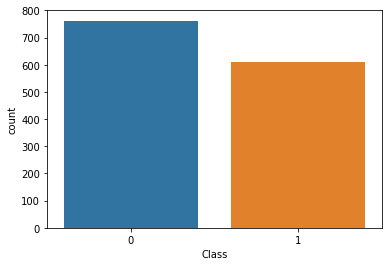

In [6]:
sns.countplot(df['Class'])

Create a PairPlot of the Data with Hue as **Class**

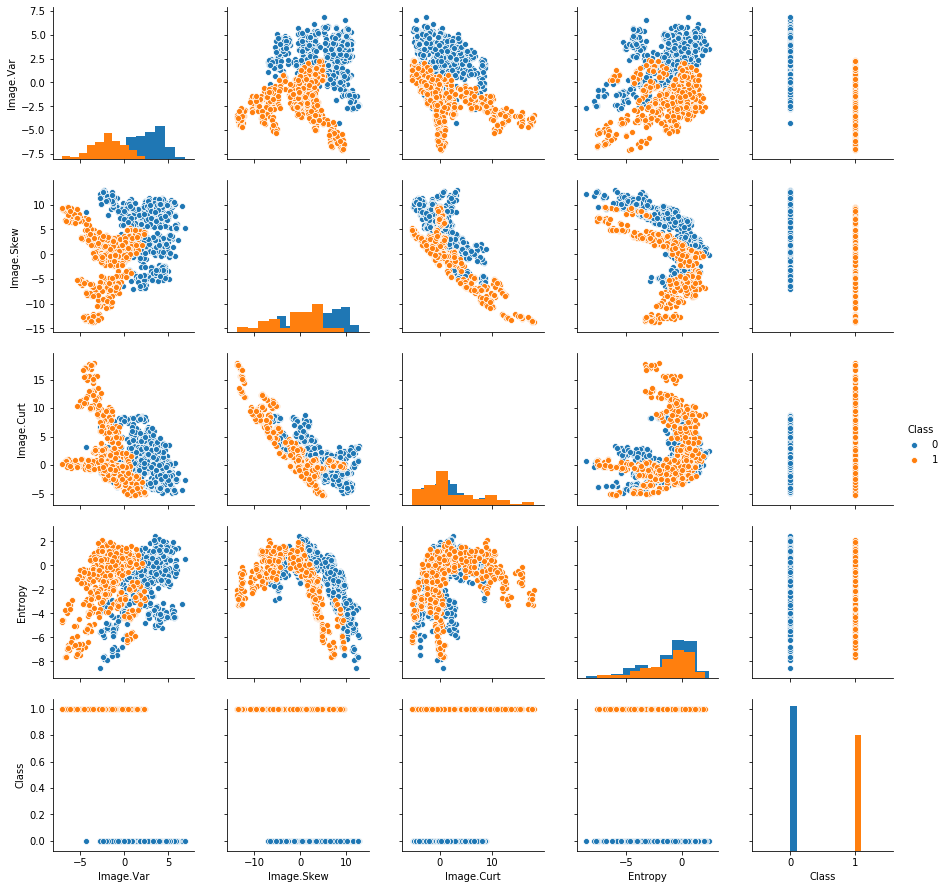

In [7]:
sns.pairplot(df,hue='Class',diag_kind='hist')


### Standard Scaling


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [13]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split


In [14]:
y = df['Class']

In [15]:
X= df_feat

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [18]:
import tensorflow as tf

In [19]:
feat_cols = []

In [20]:
for col in df_feat.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [21]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [76]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [77]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4r/nm6vnnd51jq6yw3dgswg0whm0000gn/T/tmphp11y07b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x138e6e320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [78]:
classifier.train(input_fn= lambda : input_fn(X_train,y_train,training=True),steps=9500)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/4r/nm6vnnd51jq6yw3dgswg0whm0000gn/T/tmphp11y07b/model.ckpt.
INFO:tensorflow:loss = 0.6918049, step = 0
INFO:tensorflow:global_step/sec: 249.935
INFO:tensorflow:loss = 0.6663288, step = 100 (0.401 sec)
INFO:tensor

INFO:tensorflow:loss = 0.21269053, step = 7200 (0.269 sec)
INFO:tensorflow:global_step/sec: 277.012
INFO:tensorflow:loss = 0.19697003, step = 7300 (0.360 sec)
INFO:tensorflow:global_step/sec: 292.697
INFO:tensorflow:loss = 0.20349607, step = 7400 (0.342 sec)
INFO:tensorflow:global_step/sec: 296.421
INFO:tensorflow:loss = 0.1981555, step = 7500 (0.340 sec)
INFO:tensorflow:global_step/sec: 276.796
INFO:tensorflow:loss = 0.1968458, step = 7600 (0.359 sec)
INFO:tensorflow:global_step/sec: 287.312
INFO:tensorflow:loss = 0.19603074, step = 7700 (0.348 sec)
INFO:tensorflow:global_step/sec: 297.857
INFO:tensorflow:loss = 0.18522027, step = 7800 (0.336 sec)
INFO:tensorflow:global_step/sec: 311.02
INFO:tensorflow:loss = 0.17793913, step = 7900 (0.322 sec)
INFO:tensorflow:global_step/sec: 331.386
INFO:tensorflow:loss = 0.17082776, step = 8000 (0.302 sec)
INFO:tensorflow:global_step/sec: 313.298
INFO:tensorflow:loss = 0.17137349, step = 8100 (0.319 sec)
INFO:tensorflow:global_step/sec: 341.373
INF

## Model Evaluation



In [79]:
def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [80]:
predictions =list(classifier.predict(input_fn = lambda:input_fn(X_test)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4r/nm6vnnd51jq6yw3dgswg0whm0000gn/T/tmphp11y07b/model.ckpt-9500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [81]:
predictions

[{'logits': array([-1.8372309], dtype=float32),
  'logistic': array([0.13737911], dtype=float32),
  'probabilities': array([0.8626209 , 0.13737912], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.8356478], dtype=float32),
  'logistic': array([0.13756683], dtype=float32),
  'probabilities': array([0.8624332 , 0.13756683], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.6234823], dtype=float32),
  'logistic': array([0.16472518], dtype=float32),
  'probabilities': array([0.8352748 , 0.16472517], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)}

In [82]:
final_preds=[]
for p in predictions:
    final_preds.append(p['class_ids'][0])
final_preds

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(confusion_matrix(y_test,final_preds))
print('\n')
print(classification_report(y_test,final_preds))

[[219   8]
 [  0 185]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       227
           1       0.96      1.00      0.98       185

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



You should have noticed extremely accurate results from the DNN model.